<a href="https://colab.research.google.com/github/hanbitgoun/GJ_AI/blob/main/0702_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 데이터 불러오기

In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data() # ??????

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
len(test_X)

10000

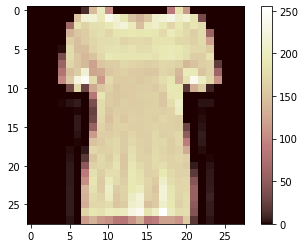

In [ ]:
#이미지화
import matplotlib.pyplot as plt

plt.imshow(train_X[10], cmap = 'pink') 
plt.colorbar()
plt.show()

In [ ]:
print(train_X[10])

[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 15

In [ ]:
print(train_X[10].shape)
print(train_X[10].ndim)

(28, 28)
2


In [ ]:
train_X_flat = train_X[10].flatten()

In [ ]:
print(train_X_flat.shape)
print(train_X_flat.ndim)

(784,)
1


In [ ]:
#softmax : 다중선택분류도와줌
#자연상수 e : 값의 차이 극명화

1. 회귀 - ANN, (DNN)
2. 이미지 - CNN
3. 자연어 - RNN
4. 생성 - GAN

In [ ]:
import numpy as np
print(np.exp(1))
print(np.exp(10))
print(np.exp(100))
print(np.exp(1000))

2.718281828459045
22026.465794806718
2.6881171418161356e+43
inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


행렬곱 numpy 함수
1. np.matmul()
2. np.dot()

In [ ]:
input_cnt = len(train_X_flat)
print(input_cnt)
output_cnt = len(set(train_Y)) # ?????/
print(output_cnt)

784
10


In [ ]:
RND_MEAN = 0
RAND_STD = 1
weight = np.random.normal(RND_MEAN,RAND_STD, size = [input_cnt, output_cnt])
bias = np.random.normal(RND_MEAN,RAND_STD, size = [output_cnt])

In [ ]:
parameter = {'w' : weight, 'b' : bias} 

In [ ]:
print(parameter['w'].shape)
print(parameter['w'].ndim)
print()
print(parameter['b'].shape)
print(parameter['b'].ndim)

(784, 10)
2

(10,)
1


In [ ]:
import pandas as pd

df_w = pd.DataFrame(parameter['w'],
                    columns=['w1','w2','w3','w4','w5','w6','w7','w8','w9','w10'])

df_b = pd.DataFrame(parameter['b'],columns=['b'])

In [ ]:
print(df_w.head())
print(df_b.head())

         w1        w2        w3  ...        w8        w9       w10
0 -1.683189 -0.673117  0.146872  ... -0.536062 -1.426233  0.693401
1  0.359539 -1.262681 -0.656825  ... -0.443572  0.245916 -1.106370
2  0.163926 -0.444597 -0.732927  ...  0.817454  1.341559  0.464609
3 -0.891324 -1.484448 -0.228281  ... -0.864685  0.144584  1.179832
4  0.061585  0.607546 -0.711160  ... -0.835908 -0.072233  0.235826

[5 rows x 10 columns]
          b
0  1.876581
1 -0.261205
2 -0.210879
3 -1.896717
4 -0.907700


In [ ]:
df_x = pd.DataFrame(train_X_flat, columns = ['input_data'])

In [ ]:
df_x.head()

,input_data
0,0
1,0
2,0
3,0
4,0


In [ ]:
df_data = pd.concat([df_x, df_w, df_b], axis=1)

In [ ]:
display(df_data)

,input_data,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b
0,0,-1.683189,-0.673117,0.146872,0.396932,0.413951,0.277072,-0.273988,-0.536062,-1.426233,0.693401,1.876581
1,0,0.359539,-1.262681,-0.656825,0.331104,1.312126,-0.235370,-0.280180,-0.443572,0.245916,-1.106370,-0.261205
2,0,0.163926,-0.444597,-0.732927,1.095202,2.331494,-1.544463,-0.382893,0.817454,1.341559,0.464609,-0.210879
3,0,-0.891324,-1.484448,-0.228281,-0.098001,1.604322,-0.305865,0.625929,-0.864685,0.144584,1.179832,-1.896717
4,0,0.061585,0.607546,-0.711160,-0.485773,0.777638,-0.043279,2.284793,-0.835908,-0.072233,0.235826,-0.907700
...,...,...,...,...,...,...,...,...,...,...,...,...
779,3,1.573194,0.667121,-0.159070,-0.350692,-0.967761,-1.337763,0.891390,-0.570674,-0.090048,2.274579,NaN
780,0,-1.112068,1.161081,1.514520,0.989734,0.833257,0.393939,-1.376008,0.954570,-0.386596,-0.884401,NaN
781,0,-0.091156,0.060892,-0.208547,1.121261,-0.165631,1.502007,0.171292,1.373980,-0.158657,-1.376716,NaN
782,0,0.769542,0.602057,0.568383,-0.053170,0.907776,-1.501934,0.626361,-0.364457,0.377999,1.220856,NaN


#### y_hat

In [ ]:
y_hat_1 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][0]
y_hat_2 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][1]
y_hat_3 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][2]
y_hat_4 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][3]
y_hat_5 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][4]
y_hat_6 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][5]
y_hat_7 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][6]
y_hat_8 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][7]
y_hat_9 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][8]
y_hat_10 = np.matmul(df_data['input_data'],df_data['w1']) + df_data['b'][9]

In [ ]:
print(y_hat_1)
print(y_hat_2)
print(y_hat_3)
print(y_hat_4)
print(y_hat_5)
print(y_hat_6)
print(y_hat_7)
print(y_hat_8)
print(y_hat_9)
print(y_hat_10)

-63.611112973765195
-65.74889925330369
-65.698573842882
-67.38441179088683
-66.39539469248848
-64.22216201745776
-64.9223277301303
-64.17178285967604
-65.49721753889577
-65.150513144585


In [ ]:
y_hat_total = np.matmul(df_data['input_data'], parameter['w']) + parameter['b']
print(y_hat_total)

[  -63.61111297 -5907.01653066 -3943.95890855 -2147.07981759
  1472.29912109  3104.07681434  3262.32369758 -6839.12549403
  4664.17539021 -3608.88090578]


In [ ]:
print(np.exp(y_hat_total))

[2.36616294e-28 0.00000000e+00 0.00000000e+00 0.00000000e+00
            inf            inf            inf 0.00000000e+00
            inf 0.00000000e+00]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


#### softmax

In [ ]:
f_mnist_max = np.max(y_hat_total)
print(f_mnist_max)

4664.17539021189


In [ ]:
diff_y_hat_row = []
for i in range(len(y_hat_total)):
  diff_y_hat = y_hat_total[i] - f_mnist_max
  diff_y_hat_row.append(diff_y_hat)
print(diff_y_hat_row)

[-4727.786503185657, -10571.191920869689, -8608.13429875897, -6811.255207805259, -3191.87626912441, -1560.0985758727088, -1401.8516926336606, -11503.300884242743, 0.0, -8273.056295995246]


In [ ]:
exp_y_hat_row = []
for i in range(len(diff_y_hat_row)):
  exp_y_hat = np.exp(diff_y_hat_row[i])
  exp_y_hat_row.append(exp_y_hat)
print(exp_y_hat_row)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]


In [ ]:
exp_i_sum = np.sum(exp_y_hat_row)
result = []

for i in range(len(exp_y_hat_row)):
    result.append(exp_y_hat_row[i]/exp_i_sum)

result = np.round(result,3)

for i in range(len(result)):
    print("Label {} : {} %".format(i, result[i] * 100))
    
print("=" * 50)
print("Result Predict - {} label".format(np.argmax(result)))
print("Y_Label : ", train_Y[10])
print("Total % : {}%".format(np.round(np.sum(result) * 100 ,2)))
print("=" * 50)

Label 0 : 0.0 %
Label 1 : 0.0 %
Label 2 : 0.0 %
Label 3 : 0.0 %
Label 4 : 0.0 %
Label 5 : 0.0 %
Label 6 : 0.0 %
Label 7 : 0.0 %
Label 8 : 100.0 %
Label 9 : 0.0 %
Result Predict - 8 label
Y_Label :  0
Total % : 100.0%
